In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'
                     ,'number_project','time_spend_company'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=8,
                 lr=0.001,
                 batch_size=1024,
                 inter_bin_distance_penalty=0.0,
                 n_epoch=100,
                 verbose=True,
                 n_bins_range=range(2,21),
                 n_init_bins_list=[5,10,15,20,30])

In [4]:
from data_handler import DataHandler
from semantic_binning import SemanticBinning
handler = DataHandler(exp.data, exp.var_dict)

In [5]:
sb = SemanticBinning(handler.var_dict, embedding_dim=8, batch_size=1024, 
                     n_epoch=20, lr=0.001, weight_decay=0.0,
                     inter_bin_distance_penalty=0.1, verbose=True)

In [6]:
sb.fit(exp.data, n_init_bins=30)

>>> Epoch = 1, Loss = 1.416719913482666
[26, 19, 22, 3, 4]
>>> Epoch = 2, Loss = 1.2128674983978271
[21, 25, 19, 3, 3]
>>> Epoch = 3, Loss = 1.0342284440994263
[17, 22, 11, 3, 4]
>>> Epoch = 4, Loss = 0.8845864534378052
[15, 20, 8, 3, 2]
>>> Epoch = 5, Loss = 0.7676311731338501
[19, 13, 8, 3, 2]
>>> Epoch = 6, Loss = 0.6781671047210693
[16, 7, 19, 3, 2]
>>> Epoch = 7, Loss = 0.5931605100631714
[16, 8, 10, 3, 2]
>>> Epoch = 8, Loss = 0.5275769233703613
[15, 6, 18, 3, 2]
>>> Epoch = 9, Loss = 0.46743154525756836
[13, 15, 17, 3, 2]
>>> Epoch = 10, Loss = 0.4192255139350891
[5, 19, 18, 3, 2]
>>> Epoch = 11, Loss = 0.3792721927165985
[5, 17, 11, 3, 2]
>>> Epoch = 12, Loss = 0.3484351933002472
[5, 15, 11, 3, 2]
>>> Epoch = 13, Loss = 0.32244572043418884
[5, 14, 9, 3, 2]
>>> Epoch = 14, Loss = 0.2983187437057495
[5, 12, 9, 3, 2]
>>> Epoch = 15, Loss = 0.27986329793930054
[5, 12, 9, 3, 2]
>>> Epoch = 16, Loss = 0.2640092372894287
[5, 11, 11, 2, 2]
>>> Epoch = 17, Loss = 0.24887749552726746
[12

In [7]:
sb.bins_by_var['satisfaction_level']['bins']

['(0.089, 0.37]',
 '(0.37, 0.43]',
 '(0.43, 0.62]',
 '(0.62, 0.7]',
 '(0.7, 0.85]',
 '(0.85, 1.0]']

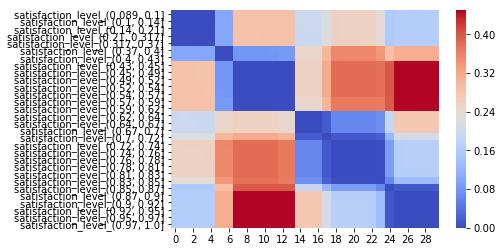

In [8]:
sb.plot_pairwise_distance_between_bins('satisfaction_level')

In [9]:
sb.bins_by_var['last_evaluation']['bins']

['(0.359, 0.52]',
 '(0.52, 0.59]',
 '(0.59, 0.61]',
 '(0.61, 0.7]',
 '(0.7, 0.76]',
 '(0.76, 0.86]',
 '(0.86, 0.89]',
 '(0.89, 1.0]']

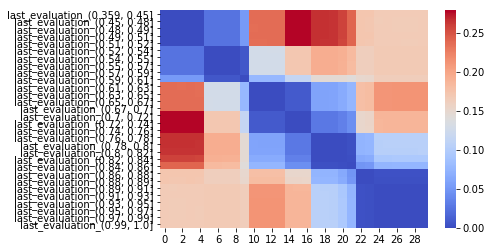

In [10]:
sb.plot_pairwise_distance_between_bins('last_evaluation')

In [11]:
sb.bins_by_var['average_montly_hours']['bins']

['(95.999, 146.0]',
 '(146.0, 162.0]',
 '(162.0, 207.0]',
 '(207.0, 232.0]',
 '(232.0, 253.0]',
 '(253.0, 262.0]',
 '(262.0, 267.0]',
 '(267.0, 310.0]']

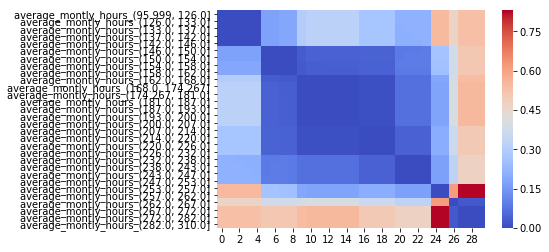

In [12]:
sb.plot_pairwise_distance_between_bins('average_montly_hours')

In [13]:
sb.bins_by_var['number_project']['bins']

['(1.999, 4.0]', '(4.0, 7.0]']

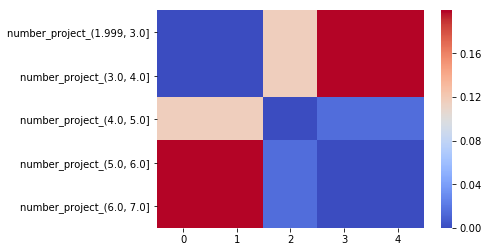

In [14]:
sb.plot_pairwise_distance_between_bins('number_project')

In [15]:
sb.bins_by_var['time_spend_company']['bins']

['(1.999, 6.0]', '(6.0, 10.0]']

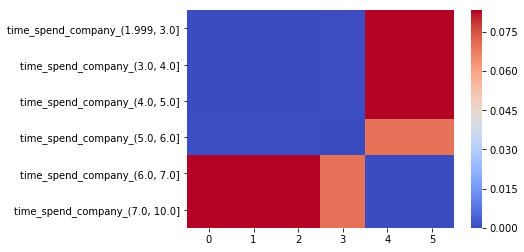

In [16]:
sb.plot_pairwise_distance_between_bins('time_spend_company')